In [3]:
import numpy as np 
import pandas as pd

In [4]:
# Import the file, global_covid19_mortality_rates.csv
import pandas as pd 
df = pd.read_csv("./global_covid19_mortality_rates.csv"); 
df.head(107)

,Unnamed: 0,Country,Confirmed,Deaths,Mortality Rate,Latitude,Longitude,Country_Code
0,0,Afghanistan,840.0,30.0,3.57,33.939110,67.709953,AF
1,1,Albania,518.0,26.0,5.02,41.153332,20.168331,AL
2,2,Algeria,2268.0,348.0,15.34,28.033886,1.659626,DZ
3,3,Andorra,673.0,33.0,4.90,42.546245,1.601554,AD
4,4,Angola,19.0,2.0,10.53,-11.202692,17.873887,AO
...,...,...,...,...,...,...,...,...
102,102,Mauritius,324.0,9.0,2.78,-20.348404,57.552152,MU
103,103,Mexico,5847.0,449.0,7.68,23.634501,-102.552784,MX
104,104,Moldova,2154.0,54.0,2.51,47.411631,28.369885,MD
105,105,Monaco,93.0,3.0,3.23,43.750298,7.412841,MC


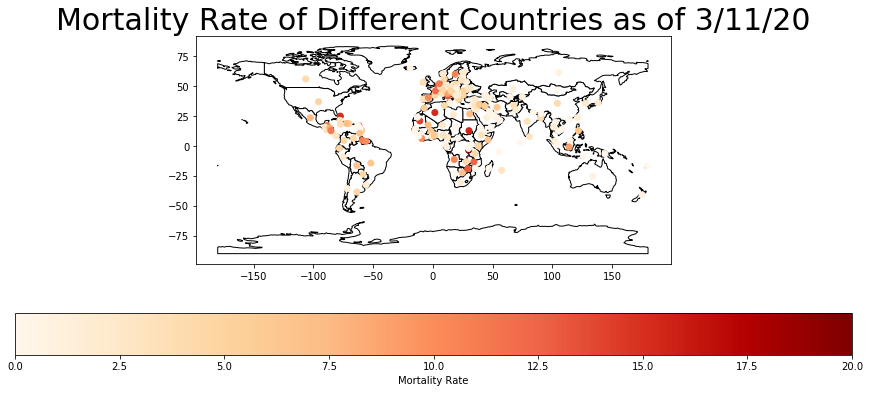

In [19]:
from shapely.geometry import Point
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black',figsize=(15, 6))
base.set_title('Mortality Rate of Different Countries as of 3/11/20', fontsize = 30)
gdf.plot(ax=base, column='Mortality Rate', cmap='OrRd', legend=True,legend_kwds={'label': "Mortality Rate", 'orientation': "horizontal"});
plt.savefig('worldde1.jpg')

In [13]:
df['Confirmed'].mean()  #Mean of Confirmed 

11821.473988439306

In [14]:
df['Confirmed'].median() #Median of Confirmed 

591.0

In [15]:
df['Confirmed'].mode() #Mode of Confirmed 

0    16.0
dtype: float64

In [16]:
df['Confirmed'].std() #Standard Deviation of Confirmed 

56623.652166777996

In [17]:
df['Confirmed'].var() #Variance of Confirmed 

3206237984.7042627

In [18]:
df['Confirmed'].describe() #Description of count, mean, standard deviation, interquartile range of Confirmed 

count       173.000000
mean      11821.473988
std       56623.652167
min           1.000000
25%          55.000000
50%         591.000000
75%        3755.000000
max      667801.000000
Name: Confirmed, dtype: float64

In [19]:
df['Mortality Rate'].mean()  #Mean of Mortality Rate 

3.803236994219652

In [20]:
df['Mortality Rate'].median() #Median of Mortality Rate 

2.55

In [21]:
df['Mortality Rate'].mode() #Mode of Mortality Rate 

0    0.0
dtype: float64

In [22]:
df['Mortality Rate'].std() #Standard Deviation of Mortality Rate 

4.060207054007736

In [23]:
df['Mortality Rate'].var() #Variance of Mortality Rate 

16.485281321414178

In [24]:
df['Mortality Rate'].describe() #Description of count, mean, standard deviation, interquartile range of Mortality Rate 

count    173.000000
mean       3.803237
std        4.060207
min        0.000000
25%        0.640000
50%        2.550000
75%        5.090000
max       20.000000
Name: Mortality Rate, dtype: float64

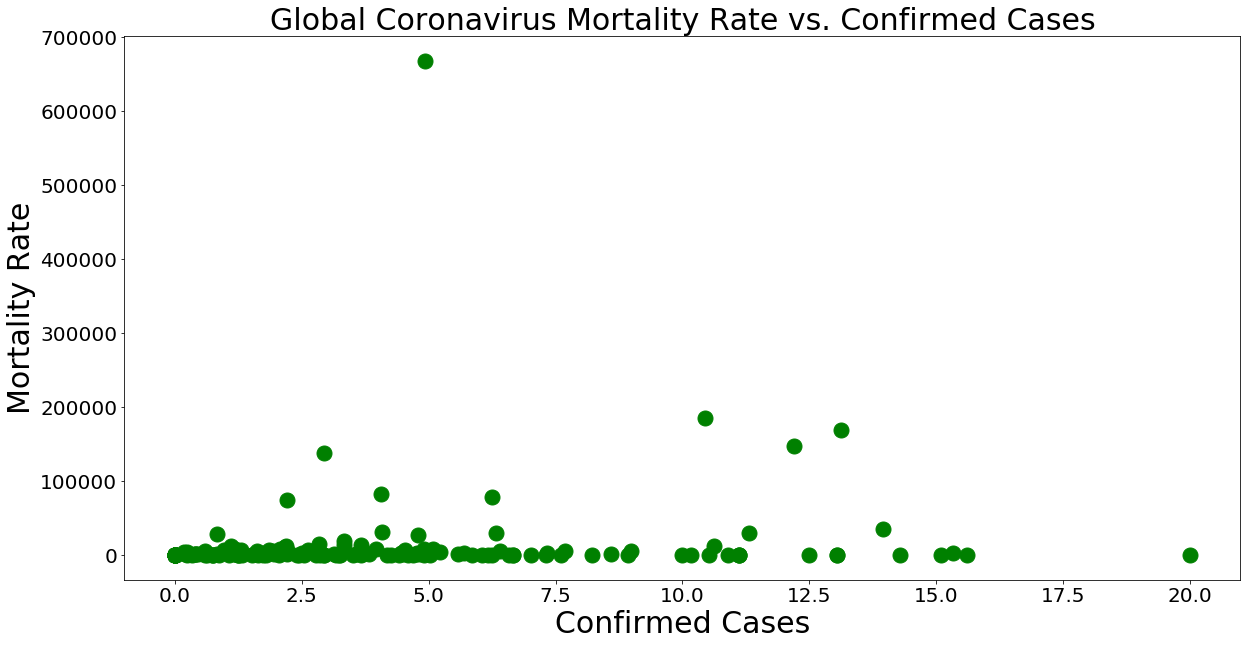

In [31]:
y=df.Confirmed
x=df['Mortality Rate'] 

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Confirmed Cases vs Mortality Rate 
plt.plot(x,y, 'go', markersize = 15)

# Add axis labels and increase the font size
plt.ylabel('Mortality Rate', fontsize = 30)
plt.xlabel('Confirmed Cases', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)


plt.title("Global Coronavirus Mortality Rate vs. Confirmed Cases", fontsize = 30)

# Display the scatter plot
plt.savefig('wde2.jpg')
plt.show()

In [32]:
import pandas as pd 
import numpy as np 
import statistics as st
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m)) #Slope 
print ('The y-intercept is {:.2f}.'.format(b)) #Y-intercept
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b)) #Simple Linear Regression

The slope of line is 1839.08.
The y-intercept is 4827.02.
The best fit simple linear regression line is 1839.08x + 4827.02.


In [33]:
%matplotlib inline

# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 3.80 and y = 11821.47.


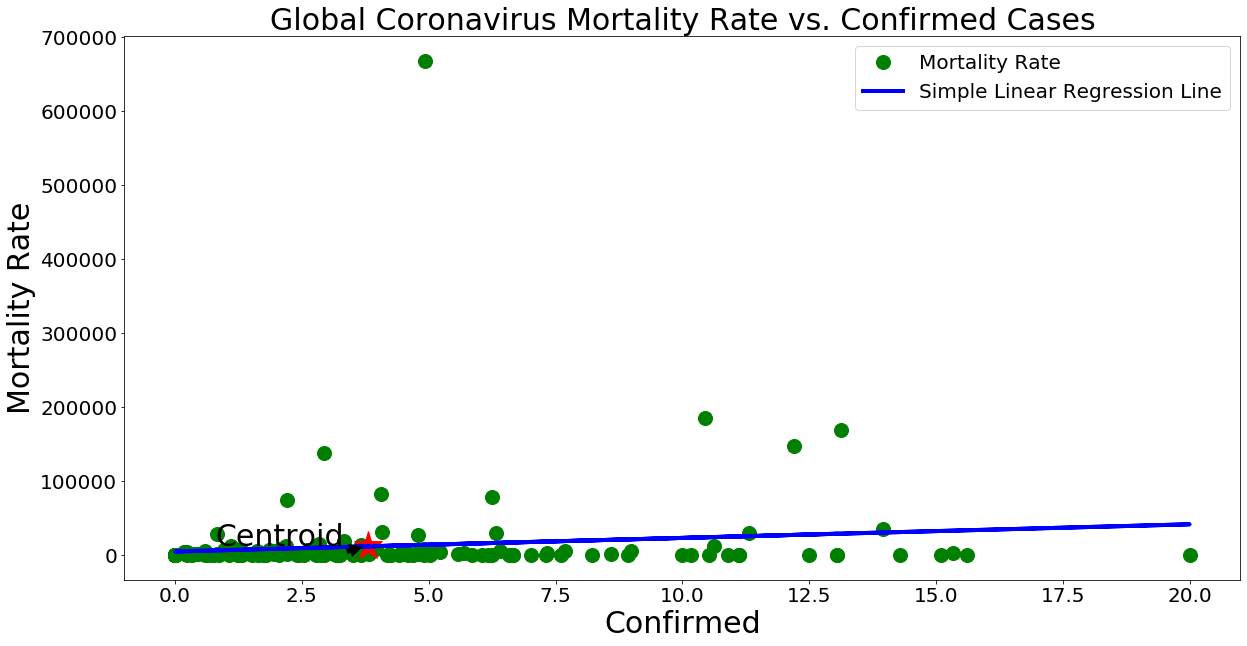

In [34]:
# Code Cell 10
# Create the plot inline
%matplotlib inline
from matplotlib import pyplot as plt
# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'go', markersize = 14, label = "Mortality Rate") 

# Plot the centroid point
plt.plot(x_mean,y_mean, 'r*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, 'b-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Mortality Rate', fontsize = 30)
plt.xlabel('Confirmed', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.title("Global Coronavirus Mortality Rate vs. Confirmed Cases", fontsize = 30)
# Create legend
plt.legend(loc = 'upper right', fontsize = 20)
plt.savefig('wder1.jpg')

In [62]:
# Code Cell 11
# Function to predict countries with confirmed cases greater than 10000 to predict mortality rate 
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must predict countries with confirmed cases greater than 10000 to predict mortality rate.")

In [30]:
predict(10000)

3.786013398646566

In [12]:
import pandas as pd 
df = pd.read_csv("./global_covid19_mortality_rates.csv");
df.head(107)

,Unnamed: 0,Country,Confirmed,Deaths,Mortality Rate,Latitude,Longitude,Country_Code
0,0,Afghanistan,840.0,30.0,3.57,33.939110,67.709953,AF
1,1,Albania,518.0,26.0,5.02,41.153332,20.168331,AL
2,2,Algeria,2268.0,348.0,15.34,28.033886,1.659626,DZ
3,3,Andorra,673.0,33.0,4.90,42.546245,1.601554,AD
4,4,Angola,19.0,2.0,10.53,-11.202692,17.873887,AO
...,...,...,...,...,...,...,...,...
102,102,Mauritius,324.0,9.0,2.78,-20.348404,57.552152,MU
103,103,Mexico,5847.0,449.0,7.68,23.634501,-102.552784,MX
104,104,Moldova,2154.0,54.0,2.51,47.411631,28.369885,MD
105,105,Monaco,93.0,3.0,3.23,43.750298,7.412841,MC


In [32]:
df['Latitude'].mean() #Mode of Mortality Rate 

20.890937364161847

In [33]:
df['Latitude'].median() #Mode of Mortality Rate 

20.593684

In [34]:
df['Latitude'].mode() #Mode of Mortality Rate 

0     -40.900557
1     -38.416097
2     -35.675147
3     -32.522779
4     -30.559482
         ...    
168    60.128161
169    60.472024
170    61.524010
171    61.924110
172    64.963051
Length: 173, dtype: float64

In [35]:
df['Latitude'].std() #Mode of Mortality Rate 

23.370914148106028

In [36]:
df['Latitude'].var() #Mode of Mortality Rate 

546.1996281181425

In [37]:
df['Latitude'].describe() #Description of count, mean, std, min, inter-quartile range, and max of Latitude 

count    173.000000
mean      20.890937
std       23.370914
min      -40.900557
25%        7.369722
50%       20.593684
75%       41.153332
max       64.963051
Name: Latitude, dtype: float64

In [38]:
df['Mortality Rate'].mean() #Mean of Mortality Rate 

3.803236994219652

In [39]:
df['Mortality Rate'].median() #Median of Mortality Rate 

2.55

In [31]:
df['Mortality Rate'].mode() #Mode of Mortality Rate 

0    0.0
dtype: float64

In [32]:
df['Mortality Rate'].std() #Standard Deviation of Mortality Rate 

3.0454063594532927

In [33]:
df['Mortality Rate'].var() #Variance of Mortality Rate 

9.27449989419856

In [34]:
df['Mortality Rate'].describe() #Description of Mortality Rate 

count    107.000000
mean       1.166636
std        3.045406
min        0.000000
25%        0.000000
50%        0.000000
75%        0.850000
max       20.000000
Name: Mortality Rate, dtype: float64

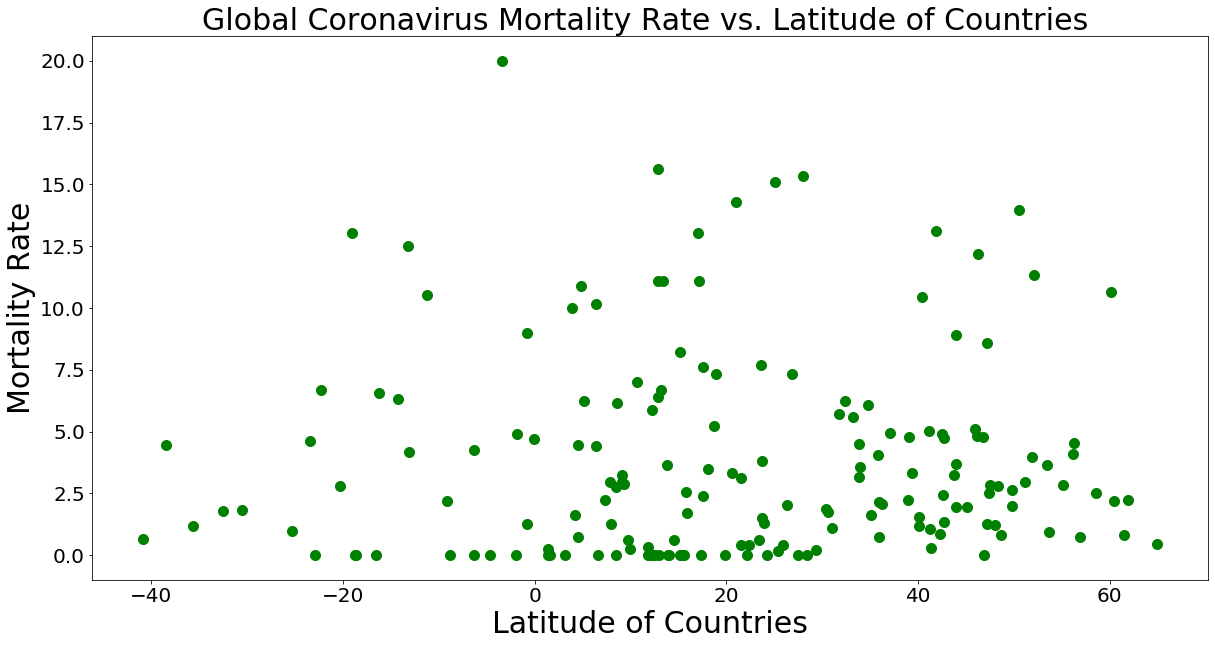

In [13]:
y=df['Mortality Rate']
x=df.Latitude

%matplotlib inline

from matplotlib import pyplot as plt

# Increase the size of the plot
plt.figure(figsize=(20,10))

# Create a scatter plot: Latitude vs Mortality Rate 
plt.plot(x,y, 'go', markersize = 10)

# Add axis labels and increase the font size
plt.ylabel('Mortality Rate', fontsize = 30)
plt.xlabel('Latitude of Countries', fontsize = 30)

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title("Global Coronavirus Mortality Rate vs. Latitude of Countries ", fontsize = 30)
# Display the scatter plot
plt.savefig('wde1.jpg')

plt.show()

In [14]:
import pandas as pd 
import numpy as np 
import statistics as st
m, b = np.polyfit(x,y,1) 
print ('The slope of line is {:.2f}.'.format(m)) #Slope 
print ('The y-intercept is {:.2f}.'.format(b)) #Y-intercept
print ('The best fit simple linear regression line is {:.2f}x + {:.2f}.'.format(m,b)) #Simple Linear Regression

The slope of line is 0.00.
The y-intercept is 3.76.
The best fit simple linear regression line is 0.00x + 3.76.


In [15]:
%matplotlib inline

# Code Cell 9
# y coordinate for centroid
y_mean = y.mean()    
# x coordinate for centroid
x_mean = x.mean()
print ('The centroid for this dataset is x = {:.2f} and y = {:.2f}.'.format(x_mean, y_mean))

The centroid for this dataset is x = 20.89 and y = 3.80.


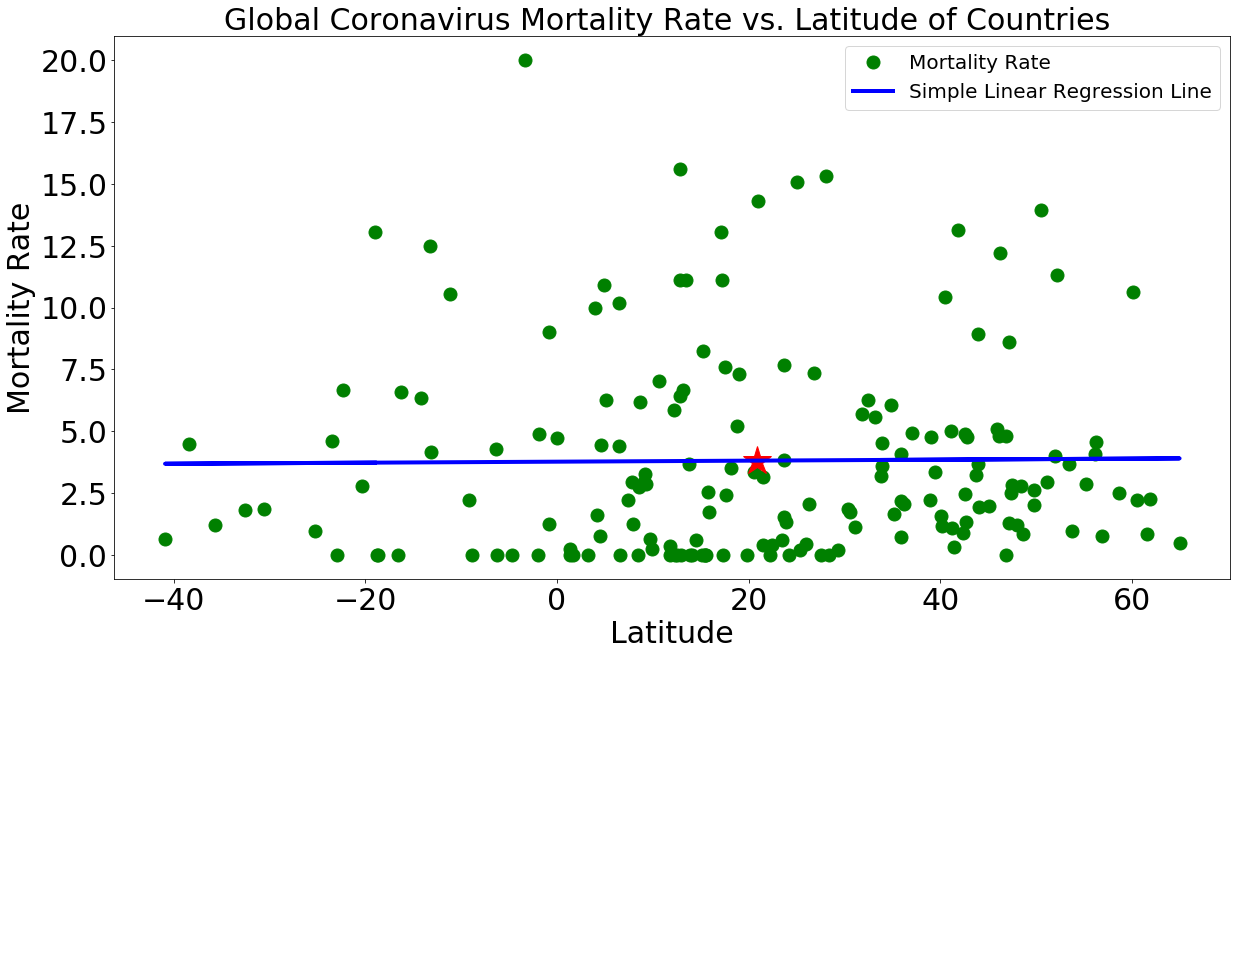

In [21]:
# Code Cell 10
# Create the plot inline
%matplotlib inline
from matplotlib import pyplot as plt
# Enlarge the plot size
plt.figure(figsize=(20,10))

# Plot the scatter plot of the data set
plt.plot(x,y, 'go', markersize = 13, label = "Mortality Rate") 

# Plot the centroid point
plt.plot(x_mean,y_mean, 'r*', markersize = 30, color = "r") 

# Plot the linear regression line
plt.plot(x, m*x + b, 'b-', label = 'Simple Linear Regression Line', linewidth = 4)

# Create the x and y axis labels
plt.ylabel('Mortality Rate', fontsize = 30)
plt.xlabel('Latitude', fontsize = 30)

# Enlarge x and y tick marks
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

# Point out the centroid point in the plot
plt.annotate('Centroid', xy=(x_mean-0.1, y_mean-5), xytext=(x_mean-3, y_mean-20), arrowprops=dict(facecolor='black', shrink=0.05), fontsize = 30)
plt.title("Global Coronavirus Mortality Rate vs. Latitude of Countries ", fontsize = 30)
# Create legend
plt.legend(loc = 'upper right', fontsize = 20)
plt.savefig('wder2.jpg')

In [44]:
# Code Cell 11
# Function to predict mortality rate of countries with latitude greater than 20
def predict(query):
    if query >= 1:
        predict = m * query + b
        return predict
    else:
        print ("You must predict countries with latitude greater than 20 to predict mortality rate.")

In [45]:
predict(40)

3.842456340068249